# Geometria Computacional - Tarefa 02: 
## Primitivas Geométricas
#### Aluno: Rômulo Freire Férrer Filho

In [1]:
import math
from typing import List

import matplotlib.pyplot as plt
import numpy as np

from gcrf import Gcrf, Point
from randomPoly import to_convex_contour

In [2]:
gc = Gcrf()

#### Questão 1:
Seja o pseudo-ângulo orientado theta(a, b) o comprimento do arco medido sobre o quadrado unitário e orientado de a (vetor a) para b (vetor b) (onde 0< theta(a, b) < 8). Pede-se:

a) Exprima theta(a, b) em termos de theta(a) e theta(b). Implemente também esse ângulo.

In [3]:
a = [0,1]
b = [1,0]
print(gc.pseudoAnguloOrientado(a))
print(gc.pseudoAnguloOrientado(b))
print(gc.pseudoAngulo2(a, b))

2.0
0.0
-2.0


b) Se pseudo-ângulo(a, b) > 0, então b está à esquerda de a e



In [4]:
a = (1, 1)
b = (1, -1)
print("Se o pseudo-ângulo for positivo, {} está à esquerda de {}:".format(a, b),
      gc.pseudoAngulo2(a, b))
print("Se o pseudo-ângulo for positivo, {} está à esquerda de {}:".format(b, a),
      gc.pseudoAngulo2(b, a))

Se o pseudo-ângulo for positivo, (1, 1) está à esquerda de (1, -1): 6.0
Se o pseudo-ângulo for positivo, (1, -1) está à esquerda de (1, 1): -6.0


c) Mostre que se a e b são ortogonais, com a à esquerda de b, então q(a, b) = 6.

Se o pseudo-ângulo for positivo, (1, 1) está à esquerda de (1, -1): 6.0
Se o pseudo-ângulo for positivo, (1, -1) está à esquerda de (1, 1): -6.0


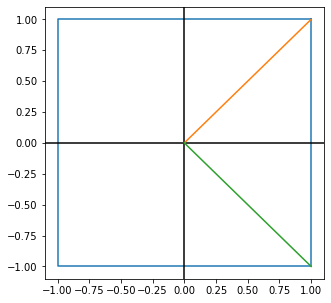

In [5]:
a = Point(1, 1)
b = Point(1, -1)
print("Se o pseudo-ângulo for positivo, {} está à esquerda de {}:".format(a, b),
      gc.pseudoAngulo2(a, b))
print("Se o pseudo-ângulo for positivo, {} está à esquerda de {}:".format(b, a),
      gc.pseudoAngulo2(b, a))
plt.figure(figsize=(5,5))
plt.grid()
gc.plotSquare()
gc.plotAxis()
gc.plotSegment([[a, Point(0,0)], [b, Point(0,0)]])

#### Questão 2:
Implemente outros tipos de pseudo-ângulos, baseados em cossenos ou não e compare os
resultados com o pseudo-ângulo da questào anterior, analisando os resultados obtidos. Para
essa comparação tente ordenar um conjunto de ângulos e compare os resultados obtidos.

In [6]:
# Usa Arc Cos
def func_ord_ang1(xn, yn):
    z = zip(xn, yn)
    z = [Point(x, y) for x, y in z]
    z = np.array(z)
    angles = [gc.anguloOrientado(i) for i in z]
    indexes = np.argsort(angles)
    z = z[indexes]
    z = z.tolist()

# Usa o quadrado unitário
def func_ord_ang2(xn, yn):
    z = zip(xn, yn)
    z = [Point(x, y) for x, y in z]
    z = np.array(z)
    angles = [gc.pseudoAnguloOrientado(i) for i in z]
    indexes = np.argsort(angles)
    z = z[indexes]
    z = z.tolist()

# Usa cosseno
def func_ord_ang3(xn, yn):
    z = zip(xn, yn)
    z = [Point(x, y) for x, y in z]
    z = np.array(z)
    angles = [gc.pseudoAngulo(i) for i in z]
    indexes = np.argsort(angles)
    z = z[indexes]
    z = z.tolist()


In [7]:
xn = np.random.random(10000)
yn = np.random.random(10000)

In [8]:
%timeit func_ord_ang1(xn, yn)

31.5 ms ± 606 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%timeit func_ord_ang2(xn, yn)

20.7 ms ± 42.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%timeit func_ord_ang3(xn, yn)

34 ms ± 429 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Questão 3:
Implemente todas as operações com vetores, desde soma até produto escalar, testando com
vetores escolhidos aleatoriamente (inclua casos patológicos como (vetores colineares, etc)). Operações entre vetores:

Soma entre os vetores [0, 2, 3] e [1, 2, 0]:  [1, 4, 3]
Subtração entre os vetores [0, 2, 3] e [1, 2, 0]:  [-1, 0, 3]


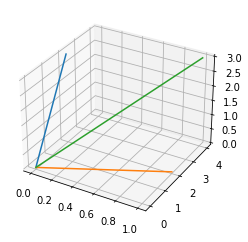

In [11]:
a = [0, 2, 3]
b = [1, 2, 0]
resSoma = gc.somavetorial(a, b)
print("Soma entre os vetores {} e {}: ".format(a, b), gc.somavetorial(a, b))
print("Subtração entre os vetores {} e {}: ".format(
    a, b), gc.subtrvetorial(a, b))

gc.plotSegment([[Point(0, 2, 3), Point(0,0,0)], [Point(1,2,0), Point(0,0,0)], [Point(resSoma[0], resSoma[1], resSoma[2]), Point(0,0,0)]], True)

Soma entre os vetores [2, 6] e [3, 9]:  [5, 15]
Subtração entre os vetores [2, 6] e [3, 9]:  [-1, -3]


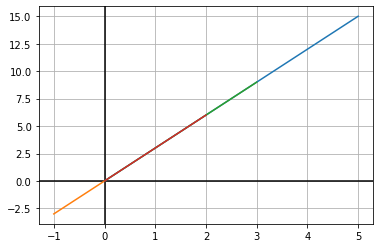

In [12]:
a = [2, 6]
b = [3, 9]
resSoma = gc.somavetorial(a, b) 
resSub = gc.subtrvetorial(a, b)
print("Soma entre os vetores {} e {}: ".format(a, b), resSoma)
print("Subtração entre os vetores {} e {}: ".format(
    a, b), resSub)

gc.plotAxis()
gc.plotSegment([[Point(resSoma[0],resSoma[1]),Point(0,0)], [Point(resSub[0],resSub[1]),Point(0,0)],[Point(3,9),Point(0,0)],  [Point(2,6),Point(0,0)]])


Multiplicando o vetor [15, 25] pelo escalar 2:  [30, 50]


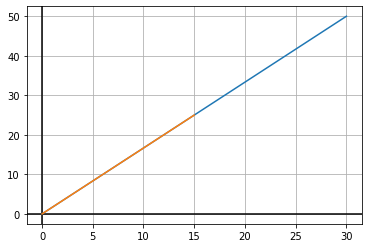

In [13]:
a = [15, 25]
b = 2
resMult = gc.multescalar(b, a)
print("Multiplicando o vetor {} pelo escalar {}: ".format(
    a, b), resMult)

gc.plotAxis()
gc.plotSegment([[Point(resMult[0],resMult[1]),Point(0,0)], [Point(15,25),Point(0,0)]])


In [14]:
a = [1, 2, 3]
b = [3, 2, 1]
print("Produto escalar entre {} e {}:".format(a, b), gc.prodescalar(a, b))

Produto escalar entre [1, 2, 3] e [3, 2, 1]: 10


In [15]:
a = [1, 2]
print("Norma do vetor {}:".format(a), gc.norma([1, 2]))

Norma do vetor [1, 2]: 2.23606797749979


In [16]:
a = [3, 3]
b = [0, 0]
print("Distância de {} para {}: ".format(a, b), gc.distancia([3, 3], [0, 0]))

Distância de [3, 3] para [0, 0]:  4.242640687119285


In [17]:
a = [2, -4, -1]
b = [0, 5, 2]
print("Ângulo entre os vetores {} e {} em radianos:".format(
    a, b), gc.angulo(a, b))
print("Ângulo entre os vetores {} e {} em graus:".format(
    a, b), gc.angulo(a, b, True))

Ângulo entre os vetores [2, -4, -1] e [0, 5, 2] em radianos: 2.671408755771823
Ângulo entre os vetores [2, -4, -1] e [0, 5, 2] em graus: 153.06044706001995


#### Questão 4:
Implemente produto vetorial e teste com vetores escolhidos aleatoriamente. Implemente
também interseção de segmentos e área orientada usando o produto vetorial implementado.

In [19]:
a = [1, 0, 0]
b = [0, 1, 0]
print("Produto vetorial entre {} e {}:".format(a, b), gc.prodvetorial(a, b))
a = [10, 0, 5]
b = [0, 5, 0]
print("Produto vetorial entre {} e {}:".format(a, b), gc.prodvetorial(a, b))
a = [1, 0]
b = [0, 1]
print("Produto vetorial entre {} e {}:".format(a, b), gc.prodvetorial(a, b))
a = [10, 0]
b = [0, 5]
print("Produto vetorial entre {} e {}:".format(a, b), gc.prodvetorial(a, b))

Produto vetorial entre [1, 0, 0] e [0, 1, 0]: [0, 0, 1]
Produto vetorial entre [10, 0, 5] e [0, 5, 0]: [0, 0, 50]
Produto vetorial entre [1, 0] e [0, 1]: 1
Produto vetorial entre [10, 0] e [0, 5]: 50


Interseção dos segmentos de retas:  True


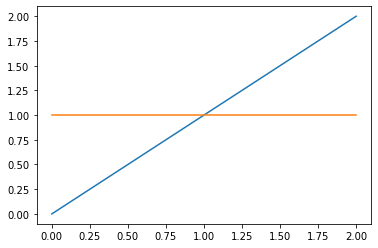

In [20]:
print("Interseção dos segmentos de retas: ", gc.intersect((0, 0), (2, 2), (0, 1), (2, 1)))
gc.plotSegment([[Point(0, 0), Point(2, 2)], [Point(0, 1), Point(2, 1)]])

Interseção dos segmentos de retas:  False


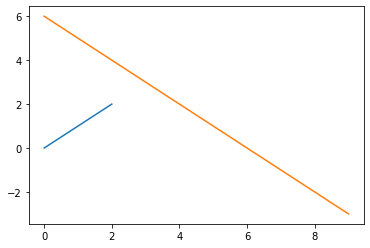

In [21]:
print("Interseção dos segmentos de retas: ",
      gc.intersect((0, 0), (2, 2), (0, 6), (9, -3)))
gc.plotSegment([[Point(0, 0), Point(2, 2)], [Point(0, 6), Point(9, -3)]])

Interseção dos segmentos de retas:  True


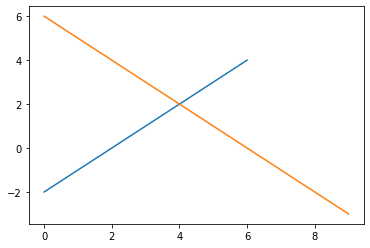

In [22]:
print("Interseção dos segmentos de retas: ",
      gc.intersect((0, -2), (6, 4), (0, 6), (9, -3)))
gc.plotSegment([[Point(0, -2), Point(6, 4)], [Point(0, 6), Point(9, -3)]])

O polígono [(0, 0), (0, 1), (2, 0)] é Anti-horário: False


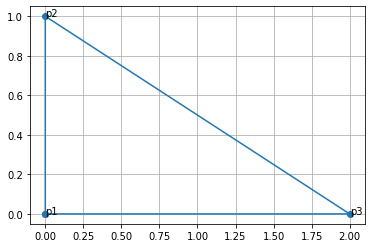

In [23]:
print("O polígono {} é Anti-horário:".format(
    [(0, 0), (0, 1), (2, 0)]), gc.antiHorario([(0, 0), (0, 1), (2, 0)]))
gc.plotPolygon([(0, 0), (0, 1), (2, 0)], True)

O polígono [(0, 0), (2, 0), (0, 1)] é Anti-horário: True


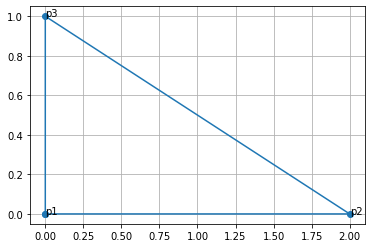

In [24]:
print("O polígono {} é Anti-horário:".format(
    [(0, 0), (2, 0), (0, 1)]), gc.antiHorario([(0, 0), (2, 0), (0, 1)]))
gc.plotPolygon([(0, 0), (2, 0), (0, 1)], True)

#### Questão 5:
Existem várias técnicas para ponto em polígono. Implemente os algoritmos do tiro e do
índice de rotação, testando para polígonos aleatórios (considere todos os casos patológicos).

Point in Polygon: True


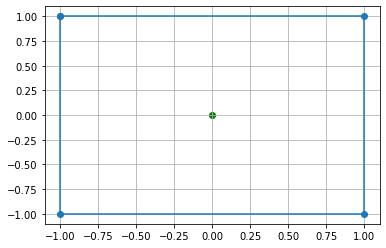

In [25]:
pip = gc.pip(Point(0, 0), [Point(-1, 1),
             Point(1, 1), Point(1, -1), Point(-1, -1)])
print("Point in Polygon:", pip)
if pip:
    plt.scatter(0, 0, c='g')
else:
    plt.scatter(0, 0, c='r')
gc.plotPolygon([Point(-1, 1), Point(1, 1), Point(1, -1), Point(-1, -1)])

Point in Polygon: False


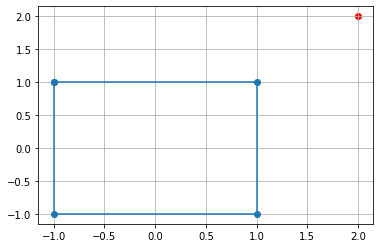

In [26]:
pip = gc.pip(Point(2, 2), [Point(-1, 1),
             Point(1, 1), Point(1, -1), Point(-1, -1)])
print("Point in Polygon:", pip)
if pip:
    plt.scatter(2, 2, c='g')
else:
    plt.scatter(2, 2, c='r')
gc.plotPolygon([Point(-1, 1), Point(1, 1), Point(1, -1), Point(-1, -1)])

Point in Polygon: False


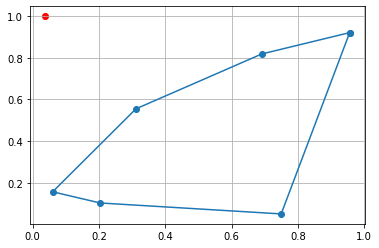

In [99]:
a = np.random.random(1)
b = np.random.random(1)
# poly = gc.genPoly(6)
poly = to_convex_contour(6)
poly = [Point(p[0], p[1]) for p in poly]
pip = gc.pip(Point(a, b), poly)
print("Point in Polygon:", pip)
if pip:
    plt.scatter(a, b, c='g')
else:
    plt.scatter(a, b, c='r')
gc.plotPolygon(poly)

Point in Polygon: True


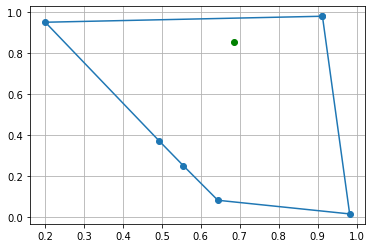

In [95]:
a = np.random.random(1)
b = np.random.random(1)
# poly = gc.genPoly(6)
poly = to_convex_contour(6)
poly = [Point(p[0], p[1]) for p in poly]
pip = gc.pip(Point(a, b), poly)
print("Point in Polygon:", pip)
if pip:
    plt.scatter(a, b, c='g')
else:
    plt.scatter(a, b, c='r')
gc.plotPolygon(poly)

#### Questão 6:
Seja o polígono dado pelos pontos abaixo, pede-se:
a) Mostre como é o polígono estrelado dos pontos dados, já ordenados.

b) Considere o ponto no centroide e mostre se ele está dentro do polígono pelo tiro e
índice de rotação, explicando todos os cálculos feitos para esse problema em questão.

c) Explique, resumidamente, qual a complexidade de cada um dos algoritmos.

O algoritmo do tiro implementado possui tempo O(n), sendo n o número de vértices do polígono, pois precisa percorrer todos os vértices para determinar se o ponto está dentro ou fora. Entretanto, esse algoritmo pode ser implementado em tempo O(log n), caso seja adotada uma estratégia de busca binária. (Referência: https://cp-algorithms-brasil.com/Geometria/pontopolig.html)

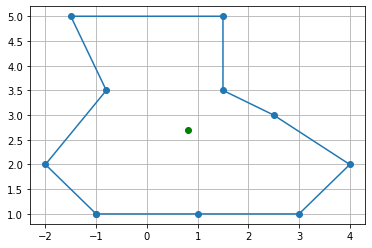

Centroid: (0.5538461538461538, 2.3076923076923075)
Centroid in polygon: False


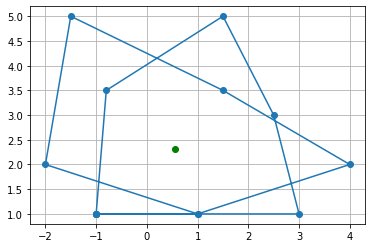

In [52]:
poly = [Point(-1, 1), Point(1, 1), Point(3, 1),
        Point(4, 2), Point(2.5, 3), Point(1.5, 3.5),
        Point(1.5, 5), Point(-1.5, 5), Point(-0.8, 3.5), Point(-2, 2)]
cx, cy = gc.centeroidnp(poly)
plt.scatter(cx, cy, c='g')
gc.plotPolygon(poly)

starredPoly = gc.starPolygon(poly, 2)

cx, cy = gc.centeroidnp(starredPoly)
print("Centroid:", (cx, cy))
print("Centroid in polygon:", gc.pip(Point(cx, cy), starredPoly))
plt.scatter(cx, cy, c='g')
gc.plotPolygon(starredPoly)

Centroid: (1.0944444444444443, 2.4722222222222223)
Centroid in polygon: True


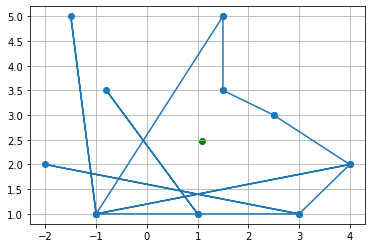

In [81]:
starredPoly = gc.starPolygon(poly, 7)

cx, cy = gc.centeroidnp(starredPoly)
print("Centroid:", (cx, cy))
print("Centroid in polygon:", gc.pip(Point(cx, cy), starredPoly))
plt.grid(0.5)
plt.scatter(cx, cy, c='g')
gc.plotPolygon(starredPoly)

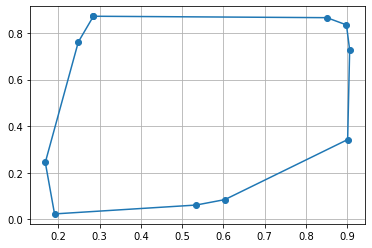

Centroid: (0.4924959854784922, 0.5633982024734164)
Centroid in polygon: False


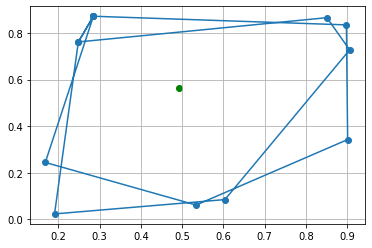

In [94]:
poly = to_convex_contour(10)
poly = [Point(p[0], p[1]) for p in poly]
gc.plotPolygon(poly)
starredPoly = gc.starPolygon(poly, 2)
cx, cy = gc.centeroidnp(starredPoly)
print("Centroid:", (cx, cy))
print("Centroid in polygon:", gc.pip(Point(cx, cy), starredPoly))
plt.grid(0.5)
plt.scatter(cx, cy, c='g')
gc.plotPolygon(starredPoly)